In [49]:
import tushare as ts
code = '600859'
start = '2020-03-01'
end = '2020-07-12'
df = ts.get_hist_data(code,start,end)
df = df.sort_index(ascending=True)
df = df[['high','low']]
df.head(5)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,high,low
date,,
2020-03-02,12.49,12.27
2020-03-03,12.57,12.40
2020-03-04,12.69,12.41
2020-03-05,13.09,12.66
2020-03-06,13.10,12.86


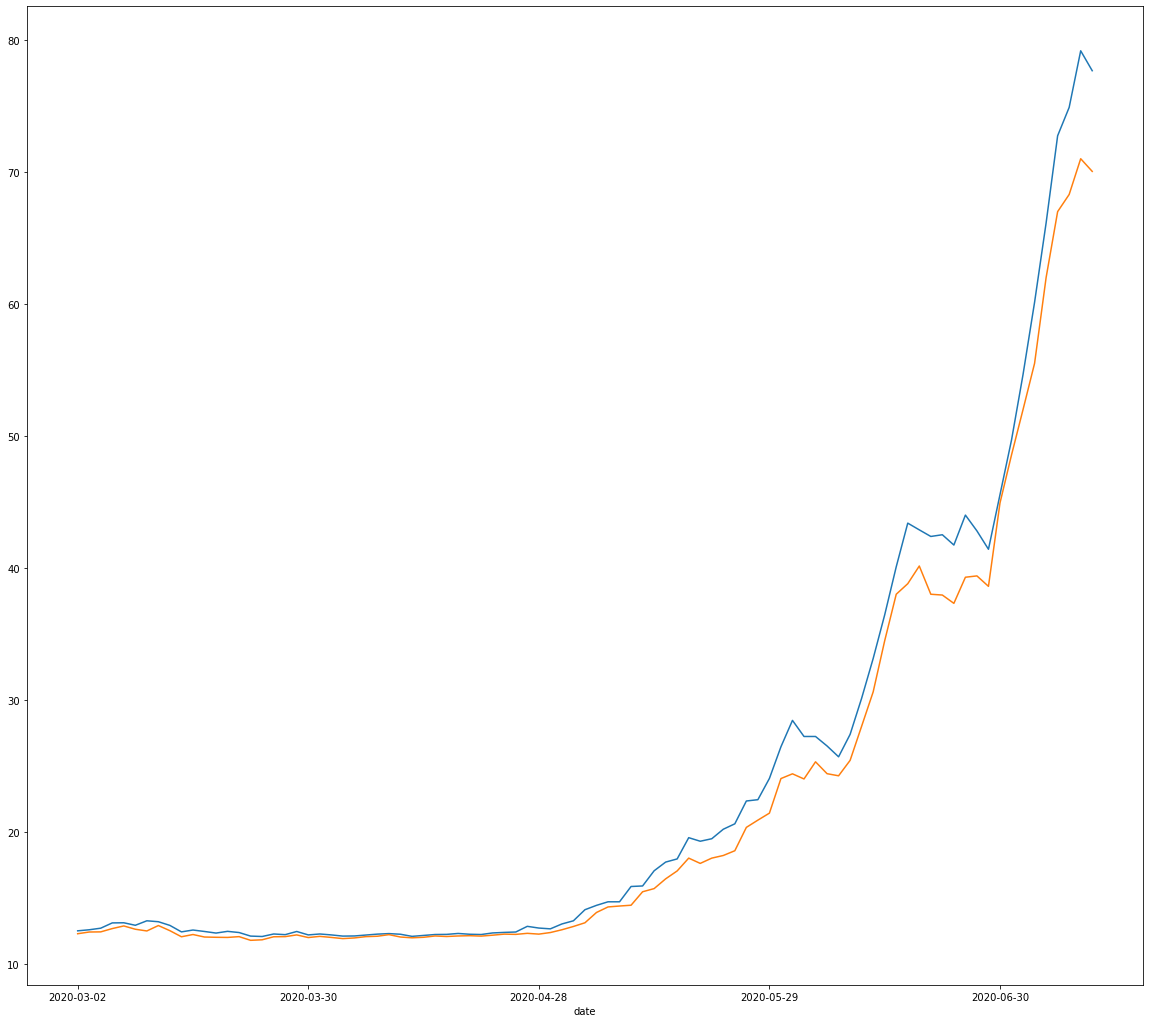

In [50]:
df.high.plot(figsize=(20,18))
df.low.plot()

# 线性回归


In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#设置预测变量和结果变量，用 GNP 预测 Employed
y=df.Employed #结果变量
X=df.GNP #预测变量
#为模型增加常数项，即回归线在 y 轴上的截距
X=sm.add_constant(X)
# 执行最小二乘回归,，X 可以是 numpy array 或 pandas dataframe（行数等于数据点个数，列数为预测变量个数），y 可以是一维数组（numpy array）或 pandas series
est=sm.OLS(y,X)

# 使用 OLS 对象的 fit() 方法来进行模型拟合
est=est.fit()
# ＃查看模型拟合的结果
est.summary()
# ＃查看最终模型的参数
est.params

In [53]:
# 代码：
y=df.high
x = df.low
x=sm.add_constant(x)
est=sm.OLS(y,x)
est=est.fit()
# print(est.summary())
est.params

const   -0.804103
low      1.103452
dtype: float64

[[ 1.         11.77      ]
 [ 1.         13.81275862]
 [ 1.         15.85551724]
 [ 1.         17.89827586]
 [ 1.         19.94103448]
 [ 1.         21.9837931 ]
 [ 1.         24.02655172]
 [ 1.         26.06931034]
 [ 1.         28.11206897]
 [ 1.         30.15482759]
 [ 1.         32.19758621]
 [ 1.         34.24034483]
 [ 1.         36.28310345]
 [ 1.         38.32586207]
 [ 1.         40.36862069]
 [ 1.         42.41137931]
 [ 1.         44.45413793]
 [ 1.         46.49689655]
 [ 1.         48.53965517]
 [ 1.         50.58241379]
 [ 1.         52.62517241]
 [ 1.         54.66793103]
 [ 1.         56.71068966]
 [ 1.         58.75344828]
 [ 1.         60.7962069 ]
 [ 1.         62.83896552]
 [ 1.         64.88172414]
 [ 1.         66.92448276]
 [ 1.         68.96724138]
 [ 1.         71.01      ]]
[12.18352413 14.43760975 16.69169538 18.945781   21.19986663 23.45395226
 25.70803788 27.96212351 30.21620913 32.47029476 34.72438038 36.97846601
 39.23255164 41.48663726 43.74072289 45.994

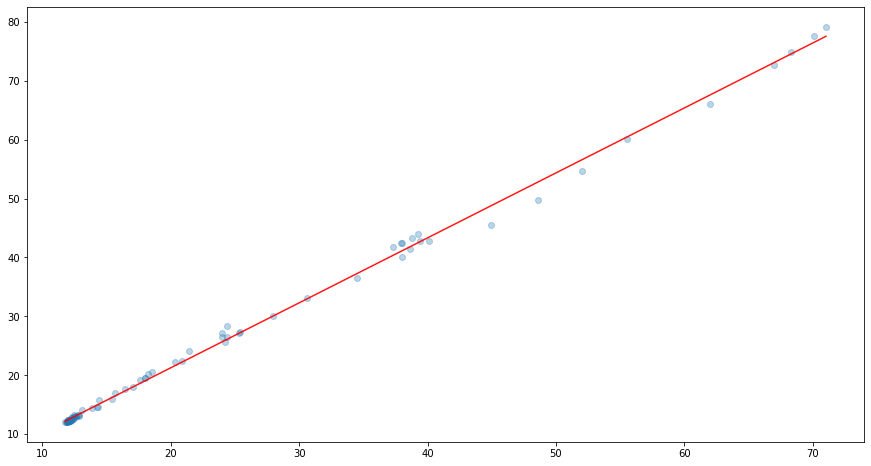

In [57]:
# ＃选择 20 个从最小值到最大值平均分布（equally spaced）的数据点
X_prime=np.linspace(x.low.min(), x.low.max(),30)[:,np.newaxis]
X_prime=sm.add_constant(X_prime)
print(X_prime)
# ＃计算预测值
y_hat=est.predict(X_prime)
print(y_hat)
fig = plt.figure(figsize=(15,8))
plt.scatter(x.low, y, alpha=0.3) #画出原始数据
plt.plot(X_prime[:,1], y_hat, 'r', alpha=0.9) #添加回归线，红色
# plt.plot(X_prime, y_hat, 'r', alpha=0.9) 